In [31]:
import numpy as np,pandas as pd
from datetime import date
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15,5]

In [2]:
colist = ['eventid','iyear','country_txt','region_txt','nkill','nkillus','nkillter','nwound','nwoundus','nwoundte','natlty1_txt','natlty2_txt','natlty3_txt','attacktype1_txt','targtype1_txt','attacktype2_txt','targtype2_txt','targtype3_txt']
ter70_91 = pd.read_csv("D:\\Manipal Pro learn\\Term1\\EDA\\Dataset\\data-society-global-terrorism-data\\original\\gtd_70to91_49566.csv",usecols=colist)
ter92_11 = pd.read_csv("D:\\Manipal Pro learn\\Term1\\EDA\\Dataset\\data-society-global-terrorism-data\\original\\gtd_92to11_no 93_55072.csv",usecols=colist)
ter93 = pd.read_csv("D:\\Manipal Pro learn\\Term1\\EDA\\Dataset\\data-society-global-terrorism-data\\original\\gtd1993_748.csv",usecols=colist)
ter12_15 = pd.read_csv("D:\\Manipal Pro learn\\Term1\\EDA\\Dataset\\data-society-global-terrorism-data\\original\\gtd_12to15_52134.csv",usecols=colist)
ter = ter70_91.append(ter92_11).append(ter93).append(ter12_15)
ter = ter.fillna(0)
ter.head()

,eventid,iyear,country_txt,region_txt,attacktype1_txt,attacktype2_txt,targtype1_txt,natlty1_txt,targtype2_txt,natlty2_txt,targtype3_txt,natlty3_txt,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte
0,197000000001,1970,Dominican Republic,Central America & Caribbean,Assassination,.,Private Citizens & Property,Dominican Republic,.,.,.,.,1.0,0.0,0.0,0.0,0.0,0.0
1,197000000002,1970,Mexico,North America,Hostage Taking (Kidnapping),.,Government (Diplomatic),Belgium,.,.,.,.,0.0,0.0,0.0,0.0,0.0,0.0
2,197001000001,1970,Philippines,Southeast Asia,Assassination,.,Journalists & Media,United States,.,.,.,.,1.0,0.0,0.0,0.0,0.0,0.0
3,197001000002,1970,Greece,Western Europe,Bombing/Explosion,.,Government (Diplomatic),United States,.,.,.,.,0.0,0.0,0.0,0.0,0.0,0.0
4,197001000003,1970,Japan,East Asia,Facility/Infrastructure Attack,.,Government (Diplomatic),United States,.,.,.,.,0.0,0.0,0.0,0.0,0.0,0.0


# 1) How have casualties evolved throughout the years? 

In [59]:
casualititesbyyear = ter[['iyear','nkill','nwound']].groupby('iyear').sum().reset_index()
casualititesbyyear['casualities'] = casualititesbyyear['nkill'] + casualititesbyyear['nwound']
casualititesbyyear.head()

,iyear,nkill,nwound,casualities
0,1970,171.0,192.0,363.0
1,1971,173.0,82.0,255.0
2,1972,566.0,222.0,788.0
3,1973,370.0,495.0,865.0
4,1974,542.0,754.0,1296.0


Text(0.5, 1.0, 'Casualities over the years')

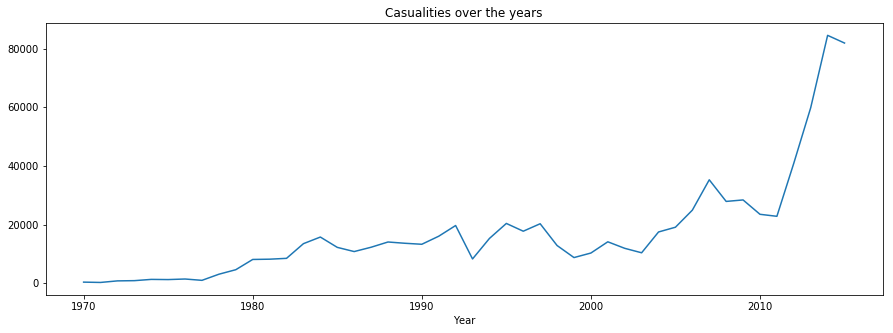

In [60]:
plt.rcParams['figure.figsize'] = [15,5]
casualititesbyyear = casualititesbyyear.rename(columns={'iyear':'Year'})
casualititesbyyear = casualititesbyyear.set_index('Year')
casualititesbyyear['casualities'].plot(kind='line',stacked=False)
plt.title('Casualities over the years')

# ----------------------------------------------END 1--------------------------------------------------

# 2) Are certain nationalities more targeted? If yes, which one? 

In [3]:
nationalities1 = ter.groupby(['natlty1_txt'])['eventid'].count().reset_index().sort_values(by = 'eventid',ascending =False)
nationalities2 = ter[ter['natlty1_txt'] != ter['natlty2_txt']].groupby(['natlty2_txt'])['eventid'].count().reset_index().sort_values(by = 'eventid',ascending =False)
nationalities3 = ter[(ter['natlty1_txt'] != ter['natlty3_txt']) & (ter['natlty2_txt'] != ter['natlty3_txt'])].groupby(['natlty3_txt'])['eventid'].count().reset_index().sort_values(by = 'eventid',ascending =False)

In [4]:
nationalities1 = nationalities1.merge(nationalities2,how='left',left_on="natlty1_txt",right_on="natlty2_txt")
nationalities1 = nationalities1.merge(nationalities3,how='left',left_on="natlty1_txt",right_on="natlty3_txt")
nationalities1 = nationalities1.fillna(0)
nationalities1.head()

,natlty1_txt,eventid_x,natlty2_txt,eventid_y,natlty3_txt,eventid
0,Iraq,18284,Iraq,85.0,Iraq,6.0
1,Pakistan,12326,Pakistan,35.0,Pakistan,3.0
2,India,10106,India,23.0,India,6.0
3,Afghanistan,8235,Afghanistan,200.0,Afghanistan,9.0
4,Colombia,7716,Colombia,21.0,Colombia,3.0


In [5]:
nationalities1['Total incidents'] = nationalities1['eventid_x'] + nationalities1['eventid_y'] + nationalities1['eventid']
nationalities1[['natlty1_txt','Total incidents']].head()

,natlty1_txt,Total incidents
0,Iraq,18375.0
1,Pakistan,12364.0
2,India,10135.0
3,Afghanistan,8444.0
4,Colombia,7740.0


In [8]:
nationalities1[['natlty1_txt','Total incidents']].to_excel('nationalities.xlsx')

In [9]:
#weather API
weather_api_key = '95041eda0b6648c599383803191103'
url= 'http://api.apixu.com/v1/current.json?key=95041eda0b6648c599383803191103&q='
import requests

In [13]:
location = pd.DataFrame()
for loc in nationalities1['natlty1_txt']:
    cur_row = {
    'nationality': loc,
    'latitude' : coordinates(loc,True),
    'longitude' : coordinates(loc,False)
    }
    location = location.append(cur_row,ignore_index=True)
location.head()

,latitude,longitude,nationality
0,33.34,44.39,Iraq
1,33.70,73.17,Pakistan
2,28.60,77.20,India
3,34.52,69.18,Afghanistan
4,4.60,-74.08,Colombia


In [16]:
tercountry = nationalities1[['natlty1_txt','Total incidents']].merge(location,left_on='natlty1_txt',right_on='nationality')
tercountry.head()

,natlty1_txt,Total incidents,latitude,longitude,nationality
0,Iraq,18375.0,33.34,44.39,Iraq
1,Pakistan,12364.0,33.70,73.17,Pakistan
2,India,10135.0,28.60,77.20,India
3,Afghanistan,8444.0,34.52,69.18,Afghanistan
4,Colombia,7740.0,4.60,-74.08,Colombia


In [20]:
tercountry[['Total incidents','latitude','longitude','nationality']].to_excel('country.xlsx',index=False)

In [22]:
import os
os.chdir('D:\Manipal Pro learn\Term1\EDA\Dataset')

In [23]:
Continents = pd.read_csv("continents.csv")
Continents.head()

,Country,Continent
0,United States of America,North America
1,Indonesia,Asia
2,India,Asia
3,Colombia,South America
4,Chile,South America


In [27]:
conti = tercountry[['Total incidents','nationality']].merge(Continents,left_on='nationality',right_on='Country')
conti.head()

,Total incidents,nationality,Country,Continent
0,12364.0,Pakistan,Pakistan,Asia
1,10135.0,India,India,Asia
2,7740.0,Colombia,Colombia,South America
3,5868.0,Peru,Peru,South America
4,5408.0,Philippines,Philippines,Asia


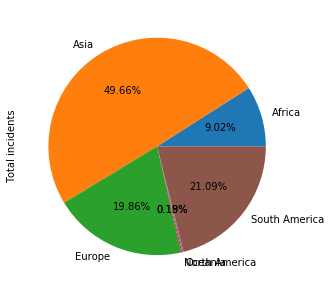

In [32]:
conti.groupby('Continent')['Total incidents'].sum().plot.pie(autopct='%.2f%%')

In [33]:
import seaborn as sns

In [ ]:
sns

In [10]:
def coordinates(loc,lat):
    if loc == '':
        return 0.0;
    result = requests.get(url+loc).json()
    if lat:
        try:
            return result['location']['lat']
        except:
            return 0.0
    else:
        try:
            return result['location']['lon']
        except:
            return 0.0

In [64]:
nationalities = nationalities1[['natlty1_txt','Total incidents']]
nationalities = nationalities.drop(index =32)
nationalities['% events'] = nationalities['Total incidents'] * 100 / nationalities['Total incidents'].sum()
nationalities = nationalities.rename(columns={'natlty1_txt':'Country'})
nationalities = nationalities.set_index('Country')
nationalities.head()

,Total incidents,% events
Country,,
Iraq,18375.0,5.865735
Pakistan,12364.0,3.946881
India,10135.0,3.235332
Afghanistan,8444.0,2.695524
Colombia,7740.0,2.470791


In [65]:
nationalities_top_5 = nationalities.head(5)
nationalities_top_5

,Total incidents,% events
Country,,
Iraq,18375.0,5.865735
Pakistan,12364.0,3.946881
India,10135.0,3.235332
Afghanistan,8444.0,2.695524
Colombia,7740.0,2.470791


Text(0.5, 1.0, 'Most targeted Top 5 countries')

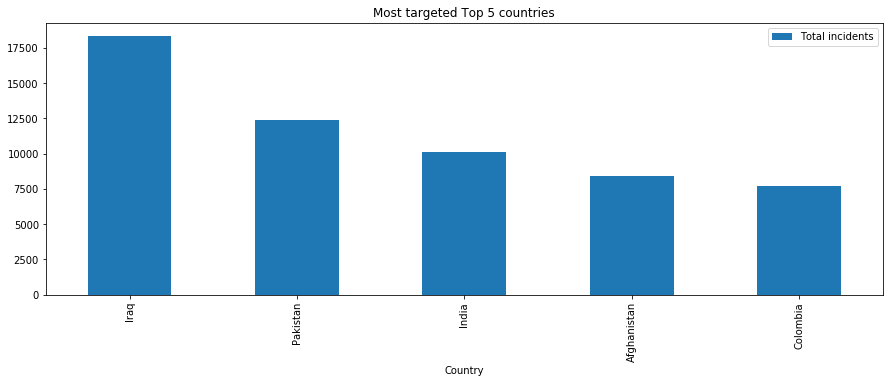

In [66]:
nationalities_top_5[['Total incidents']].plot(kind='bar',stacked=False)
plt.title('Most targeted Top 5 countries')

In [67]:
#total nationalists count
nationalities['Total incidents'].count()

212

In [68]:
#percentage of top 5 nationalists
nationalities_top_5['% events'].sum()

18.214262912596567

# ------------------------------------------END 2-------------------------------------------------

# 3) Are some countries better at defending themselves against terrorist attacks? If yes, which is the safest country to live 

In [69]:
countrycasualities = ter[['iyear','country_txt','nkill','nwound']].groupby(['country_txt','iyear']).sum().reset_index()
countrycasualities['casuality'] = countrycasualities['nkill'] + countrycasualities['nwound']
countrycasualities.head()

,country_txt,iyear,nkill,nwound,casuality
0,Afghanistan,1973,0.0,1.0,1.0
1,Afghanistan,1979,53.0,1.0,54.0
2,Afghanistan,1987,0.0,2.0,2.0
3,Afghanistan,1988,128.0,106.0,234.0
4,Afghanistan,1989,10.0,84.0,94.0


# Safest country  to live based on ability to defend

In [70]:
ls = []
for index,data in countrycasualities.groupby('country_txt'):
    cor = data[['iyear','casuality']].corr()['iyear']['casuality']
    if (data['casuality'].sum() > 400) & (cor < -0.5):
        ls.append((index,cor))

ls

[('Kosovo', -0.6934182678746834)]

Text(0.5, 1.0, 'Kosovo attack pattern over the years')

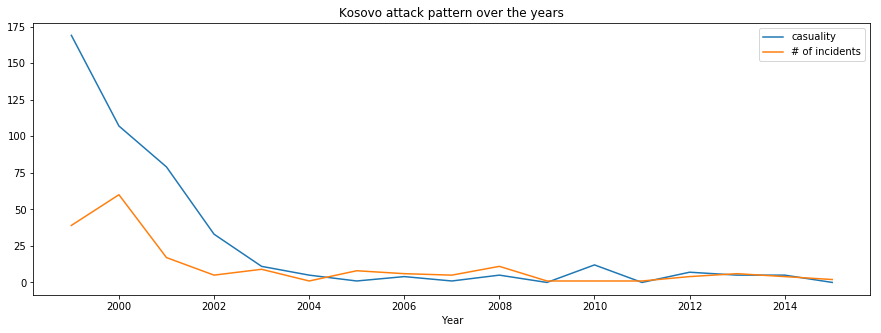

In [71]:
countryincidents = ter[['iyear','country_txt','eventid']].groupby(['country_txt','iyear']).count().reset_index()
kosovoincidents = countryincidents[countryincidents['country_txt'] == 'Kosovo']
kosovoincidents = kosovoincidents[['iyear','eventid']].rename(columns={'iyear':'Year',"eventid":'# of incidents'}).set_index('Year')
kosovocasualities = countrycasualities[countrycasualities['country_txt'] == 'Kosovo']
kosovocasualities = kosovocasualities[['iyear','casuality']].rename(columns={'iyear':'Year'}).set_index('Year')
kosovo = kosovocasualities.join(kosovoincidents)
kosovo.plot(kind='line',stacked=False)
plt.title('Kosovo attack pattern over the years')

# Safest Country to live based on incidents and casuality

In [75]:
countrycasualities1 = countrycasualities.groupby('country_txt').sum().reset_index()
countrycasualities1.head()

,country_txt,iyear,nkill,nwound,casuality
0,Afghanistan,61981,27018.0,31636.0,58654.0
1,Albania,31993,42.0,126.0,168.0
2,Algeria,59970,11129.0,9072.0,20201.0
3,Andorra,1974,0.0,0.0,0.0
4,Angola,53766,3038.0,2051.0,5089.0


In [76]:
countryzerocasuality = countrycasualities1[(countrycasualities1['nkill'] == 0) & (countrycasualities1['nwound'] == 0)]
countryzerocasuality.head()

,country_txt,iyear,nkill,nwound,casuality
3,Andorra,1974,0.0,0.0,0.0
5,Antigua and Barbuda,1992,0.0,0.0,0.0
37,Corsica,1993,0.0,0.0,0.0
58,Falkland Islands,1983,0.0,0.0,0.0
82,Iceland,7995,0.0,0.0,0.0


In [80]:
countryzerocasualityincidents = ter[ter['country_txt'].isin(countryzerocasuality['country_txt'])].groupby('country_txt').size().reset_index()
countryzerocasualityincidents = countryzerocasualityincidents.rename(columns={0:'# of incidents'})
countryzerocasualityincidents.head()

,country_txt,# of incidents
0,Andorra,1
1,Antigua and Barbuda,1
2,Corsica,5
3,Falkland Islands,1
4,Iceland,4


In [84]:
countryzerocasuality.merge(countryzerocasualityincidents).sort_values(by='# of incidents',ascending=False).head(1)

,country_txt,iyear,nkill,nwound,casuality,# of incidents
2,Corsica,1993,0.0,0.0,0.0,5


# ------------------------------------------END 3 ---------------------------------------------------

# 4) Terror attack pattern in United States vs Russian Federation/USSR in last 45 years 

In [34]:
USvsRU=ter[(ter["country_txt"]=="United States")|(ter["country_txt"]=="Russia")|(ter["country_txt"]=="Soviet Union")]
USvsRU_attack=USvsRU.groupby(["country_txt","iyear","attacktype1_txt","attacktype2_txt"]).count().reset_index()
USvsRU_attack.head()

,country_txt,iyear,attacktype1_txt,attacktype2_txt,eventid,region_txt,targtype1_txt,natlty1_txt,targtype2_txt,natlty2_txt,targtype3_txt,natlty3_txt,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte
0,Russia,1992,Armed Assault,.,5,5,5,5,5,5,5,5,5,5,5,5,5,5
1,Russia,1992,Assassination,.,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2,Russia,1992,Bombing/Explosion,.,6,6,6,6,6,6,6,6,6,6,6,6,6,6
3,Russia,1992,Facility/Infrastructure Attack,.,2,2,2,2,2,2,2,2,2,2,2,2,2,2
4,Russia,1992,Hijacking,.,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [35]:
russiaattack = USvsRU_attack[(USvsRU_attack['country_txt']=='Russia')|(USvsRU_attack['country_txt']=='Soviet Union') ]
usattack = USvsRU_attack[USvsRU_attack['country_txt']=='United States']
usattack.head()

,country_txt,iyear,attacktype1_txt,attacktype2_txt,eventid,region_txt,targtype1_txt,natlty1_txt,targtype2_txt,natlty2_txt,targtype3_txt,natlty3_txt,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte
214,United States,1970,Armed Assault,.,26,26,26,26,26,26,26,26,26,26,26,26,26,26
215,United States,1970,Armed Assault,Bombing/Explosion,1,1,1,1,1,1,1,1,1,1,1,1,1,1
216,United States,1970,Armed Assault,Facility/Infrastructure Attack,1,1,1,1,1,1,1,1,1,1,1,1,1,1
217,United States,1970,Assassination,.,8,8,8,8,8,8,8,8,8,8,8,8,8,8
218,United States,1970,Bombing/Explosion,.,277,277,277,277,277,277,277,277,277,277,277,277,277,277


In [36]:
usarussiaattack = usattack.groupby('iyear')['eventid'].sum().reset_index().merge(russiaattack.groupby('iyear')['eventid'].sum().reset_index(),on='iyear',how='left')
usarussiaattack = usarussiaattack.rename(columns={'iyear':'Year','eventid_x':'USA','eventid_y':'Russia'})
usarussiaattack.head()

,Year,USA,Russia
0,1970,468,NaN
1,1971,247,NaN
2,1972,64,NaN
3,1973,58,NaN
4,1974,94,NaN


In [37]:
usarussiaattack

,Year,USA,Russia
0,1970,468,NaN
1,1971,247,NaN
2,1972,64,NaN
3,1973,58,NaN
4,1974,94,NaN
5,1975,149,NaN
6,1976,105,NaN
7,1977,130,NaN
8,1978,87,1.0
9,1979,69,NaN


Text(0.5, 1.0, 'USA and Russia terror attack over the years')

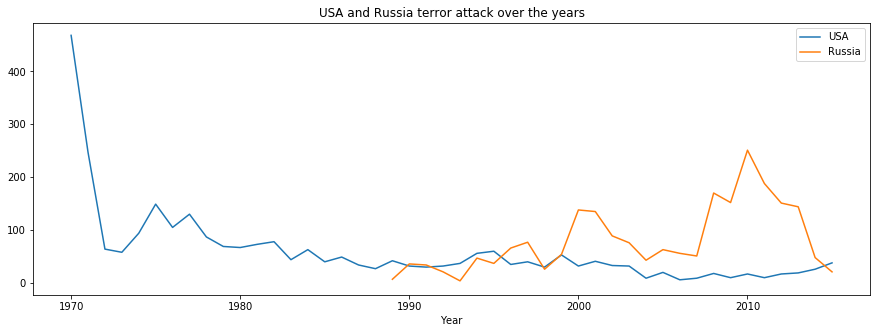

In [89]:
usarussiaattack.set_index('Year').plot(kind='line')
plt.title('USA and Russia terror attack over the years')

In [90]:
USvsRU_attack.head()

,country_txt,iyear,attacktype1_txt,attacktype2_txt,eventid,region_txt,targtype1_txt,natlty1_txt,targtype2_txt,natlty2_txt,targtype3_txt,natlty3_txt,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte
0,Russia,1992,Armed Assault,.,5,5,5,5,5,5,5,5,5,5,5,5,5,5
1,Russia,1992,Assassination,.,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2,Russia,1992,Bombing/Explosion,.,6,6,6,6,6,6,6,6,6,6,6,6,6,6
3,Russia,1992,Facility/Infrastructure Attack,.,2,2,2,2,2,2,2,2,2,2,2,2,2,2
4,Russia,1992,Hijacking,.,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [91]:
Russiaattacktypes = USvsRU_attack[USvsRU_attack['country_txt']=='Russia'].groupby(['iyear','attacktype1_txt'])['eventid'].sum().reset_index()
Russiaattacktypes = Russiaattacktypes.rename(columns={'iyear':'Year','attacktype1_txt':'Attack Type','eventid':'# of events'})
Russiaattacktypes.head()

,Year,Attack Type,# of events
0,1992,Armed Assault,5
1,1992,Assassination,3
2,1992,Bombing/Explosion,6
3,1992,Facility/Infrastructure Attack,2
4,1992,Hijacking,2


In [92]:
Russiaattacktypespivot = Russiaattacktypes.pivot('Year','Attack Type','# of events')
Russiaattacktypespivot = Russiaattacktypespivot.fillna(0)
Russiaattacktypespivot.head()

Attack Type,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
Year,,,,,,,,,
1992,5.0,3.0,6.0,2.0,2.0,0.0,2.0,0.0,1.0
1993,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1994,1.0,15.0,22.0,0.0,4.0,2.0,0.0,0.0,3.0
1995,2.0,12.0,16.0,0.0,4.0,1.0,1.0,0.0,1.0
1996,5.0,22.0,32.0,0.0,1.0,1.0,4.0,0.0,1.0


Text(0.5, 1.0, 'Russia attack pattern over the years')

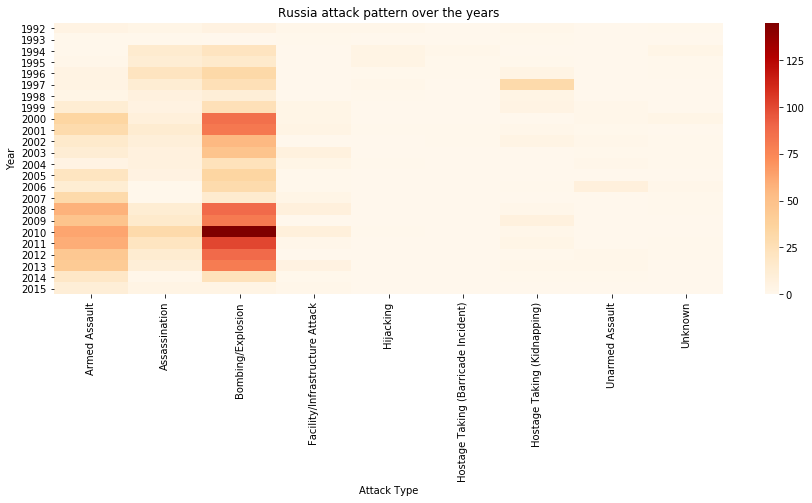

In [93]:
import seaborn as sns
sns.heatmap(Russiaattacktypespivot,cmap="OrRd")
plt.title('Russia attack pattern over the years')

In [94]:
usattacktypes = USvsRU_attack[USvsRU_attack['country_txt']=='United States'].groupby(['iyear','attacktype1_txt'])['eventid'].sum().reset_index()
usattacktypes = usattacktypes.rename(columns={'iyear':'Year','attacktype1_txt':'Attack Type','eventid':'# of events'})
usattacktypes.head()

,Year,Attack Type,# of events
0,1970,Armed Assault,28
1,1970,Assassination,8
2,1970,Bombing/Explosion,278
3,1970,Facility/Infrastructure Attack,149
4,1970,Hijacking,2


In [95]:
usattacktypespivot = usattacktypes.pivot('Year','Attack Type','# of events')
usattacktypespivot = usattacktypespivot.fillna(0)
usattacktypespivot.head()

Attack Type,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
Year,,,,,,,,,
1970,28.0,8.0,278.0,149.0,2.0,0.0,1.0,2.0,0.0
1971,21.0,4.0,143.0,75.0,1.0,1.0,1.0,0.0,1.0
1972,3.0,5.0,36.0,15.0,2.0,2.0,1.0,0.0,0.0
1973,22.0,8.0,19.0,4.0,0.0,2.0,3.0,0.0,0.0
1974,14.0,3.0,63.0,11.0,0.0,0.0,1.0,2.0,0.0


Text(0.5, 1.0, 'USA attack pattern over the years')

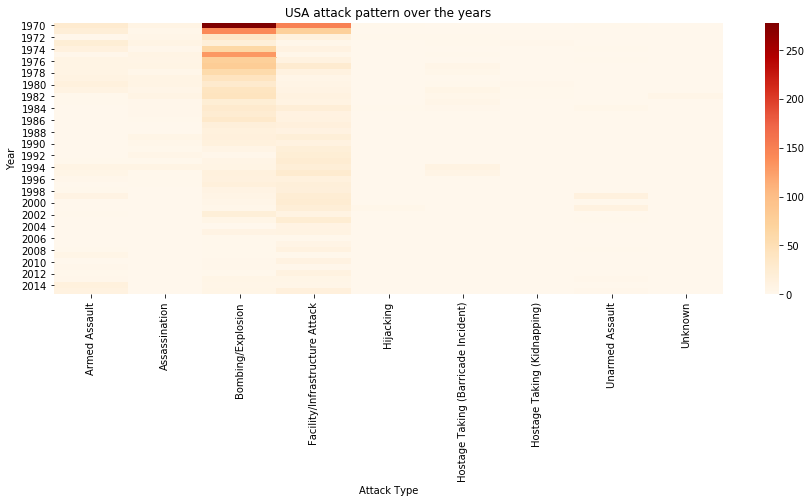

In [96]:
sns.heatmap(usattacktypespivot,cmap="OrRd")
plt.title('USA attack pattern over the years')

# ------------------------------------------END 4-------------------------------------------------

# 5) Terrorist attack in India and Pakistan in last 45 years

In [26]:
indopakter = ter[(ter['country_txt'] == 'India') | (ter['country_txt'] == 'Pakistan')]
indopakterbyyear = indopakter.groupby(['country_txt','iyear'])['eventid'].count().reset_index()
indopakterbyyear.head()

,country_txt,iyear,eventid
0,India,1972,1
1,India,1975,1
2,India,1976,1
3,India,1977,1
4,India,1979,20


In [46]:
indopakratio = indopakterbyyear.merge(indopakter.groupby(['country_txt','iyear'])['nkill'].sum().reset_index())
indopakratio.head()

,country_txt,iyear,eventid,nkill
0,India,1972,1,0.0
1,India,1975,1,4.0
2,India,1976,1,0.0
3,India,1977,1,0.0
4,India,1979,20,31.0


In [47]:
indopakratio['kill to incident ratio'] = indopakratio['nkill'] / indopakratio['eventid']
indopakratio.head()

,country_txt,iyear,eventid,nkill,kill to incident ratio
0,India,1972,1,0.0,0.00
1,India,1975,1,4.0,4.00
2,India,1976,1,0.0,0.00
3,India,1977,1,0.0,0.00
4,India,1979,20,31.0,1.55


In [57]:
indratio = indopakratio[indopakratio['country_txt'] == 'India'][['iyear','kill to incident ratio']]
indratio = indratio.rename(columns={'kill to incident ratio':'India','iyear':'year'})
indratio.head()

,year,India
0,1972,0.00
1,1975,4.00
2,1976,0.00
3,1977,0.00
4,1979,1.55


In [58]:
pakratio = indopakratio[indopakratio['country_txt'] == 'Pakistan'][['iyear','kill to incident ratio']]
pakratio = pakratio.rename(columns={'kill to incident ratio':'Pakistan','iyear':'year'})
pakratio.head()

,year,Pakistan
41,1970,1.000000
42,1974,0.000000
43,1975,0.500000
44,1976,0.333333
45,1978,2.500000


Text(0.5, 1.0, 'Deaths per attack')

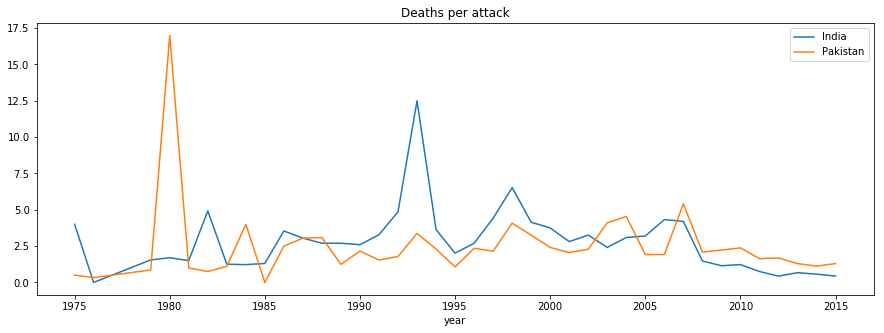

In [61]:
indratio.merge(pakratio).set_index('year').plot.line()
plt.title('Deaths per attack')

Text(0.5, 1.0, 'India and Pakiistan terror attack pattern')

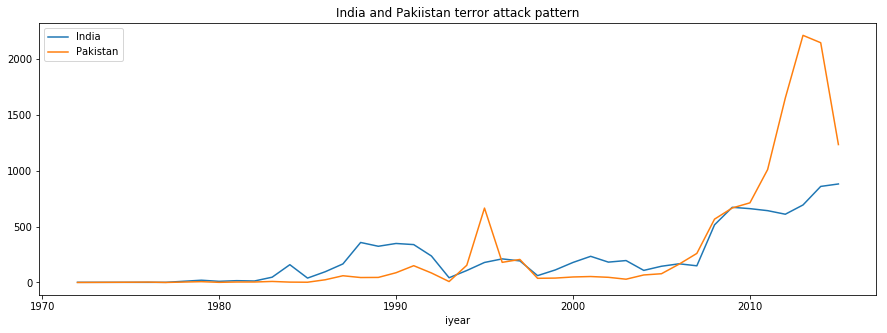

In [39]:
indbyyear = indopakterbyyear[indopakterbyyear['country_txt'] == 'India']
pakbyyear = indopakterbyyear[indopakterbyyear['country_txt'] == 'Pakistan']
indbyyear = indbyyear.set_index('iyear')
pakbyyear = pakbyyear.set_index('iyear')
indopakbyyear = indbyyear.join(pakbyyear,on='iyear',rsuffix='1')
indopakbyyear = indopakbyyear[['eventid','eventid1']]
indopakbyyear = indopakbyyear.fillna(0)
indopakbyyear = indopakbyyear.rename(columns={'eventid':'India','eventid1':'Pakistan'})
indopakbyyear.plot(kind = 'line',stacked=False)
plt.title('India and Pakiistan terror attack pattern')

# ------------------------------------------------END 5---------------------------------------

# 6) Heaviest hit Target types (Based on both Killed and wounded) 

Text(0.5, 1.0, 'casualities for different Target types')

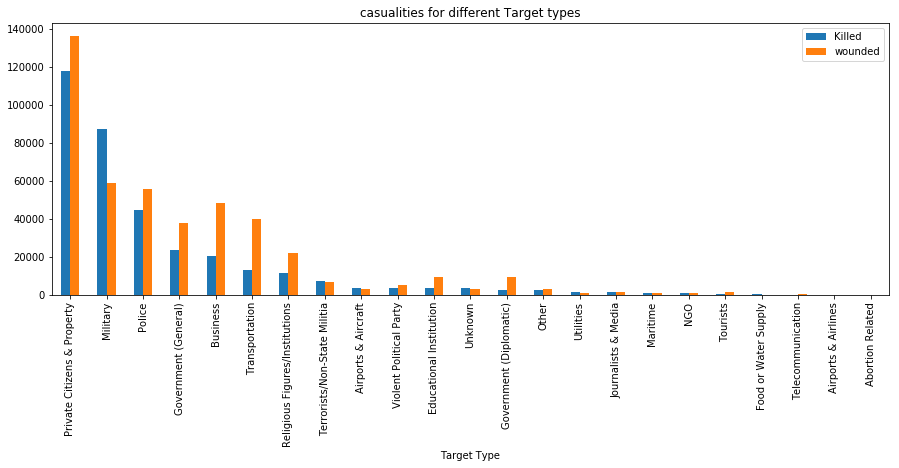

In [101]:
target1=ter[["targtype1_txt","nkill","nwound"]]
target1
target1=target1.dropna()
target1=target1.groupby("targtype1_txt").sum().reset_index()
target1= target1.rename(columns={'targtype1_txt':'Target Type','nkill':'Killed','nwound':'wounded'})
target1 = target1.set_index('Target Type')
sorttarget1=target1.sort_values(by="Killed",ascending=False)
sorttarget1.plot(kind='bar',stacked=False)
plt.title('casualities for different Target types')

# ---------------------------------------------END 6-------------------------------------------------

# -----------------------------END of Document-----------------------------

In [5]:
indopakbyyear

,India,Pakistan
iyear,,
1972,1,0.0
1975,1,2.0
1976,1,3.0
1977,1,0.0
1979,20,7.0
1980,10,1.0
1981,16,4.0
1982,13,4.0
1983,47,9.0
